In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [22]:
df1 = pd.read_csv('data/output/distinctCusips_totalVolume_2002-2022.csv')
df2 = pd.read_csv('data/output/distinctCusips_totalVolume_by_retail_institutional_2002-2022.csv')
df3 = pd.read_csv('data/output/totalVolume_by_side_2002-2022.csv')

### Distinct Cusips | Total Volume

In [3]:
df1['TrdExctnDt_'] = pd.to_datetime(df1['TrdExctnDt'])

df1['Week'] = df1['TrdExctnDt_'].dt.strftime("%U").astype(str) + \
                                '-' + pd.DatetimeIndex(df1['TrdExctnDt_']).year.astype(str)

df1['Year'] = df1['TrdExctnDt_'].dt.year

df1_gr = df1.groupby('Year').aggregate({
    'DistinctCusips': np.mean,
    'TotalVolume': np.mean
}).reset_index()

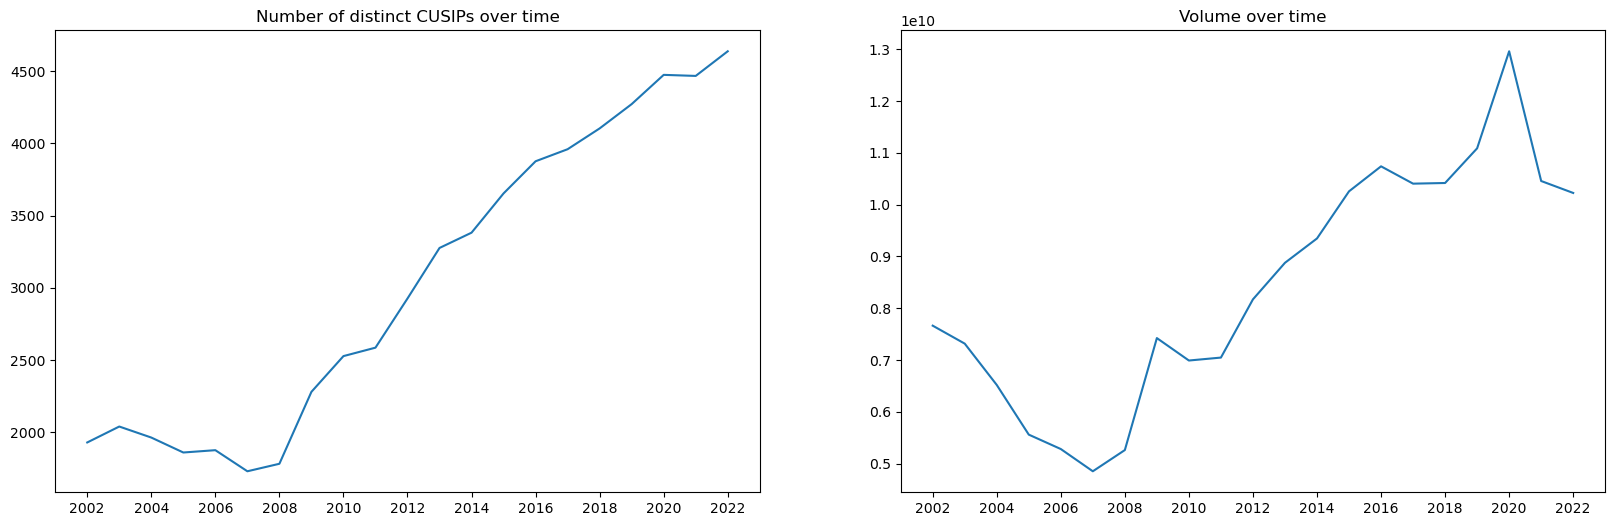

In [4]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.title('Number of distinct CUSIPs over time')
plt.plot(df1_gr['Year'], df1_gr['DistinctCusips'])
plt.xticks([x for x in range(2002, 2023, 2)])

plt.subplot(1, 2, 2)
plt.title('Volume over time')
plt.plot(df1_gr['Year'], df1_gr['TotalVolume'])
plt.xticks([x for x in range(2002, 2023, 2)])

plt.show()

### Distinct Cusips | Total Volume | Retail-Institunional

In [8]:
df2['TrdExctnDt_'] = pd.to_datetime(df2['TrdExctnDt'])

df2['Week'] = df2['TrdExctnDt_'].dt.strftime("%U").astype(str) + \
                                '-' + pd.DatetimeIndex(df2['TrdExctnDt_']).year.astype(str)

df2['Year'] = df2['TrdExctnDt_'].dt.year

df2_gr = df2.groupby(['Year', 'RetailThreshold']).aggregate({
    'DistinctCusips': np.mean,
    'TotalVolume': np.mean
}).reset_index()

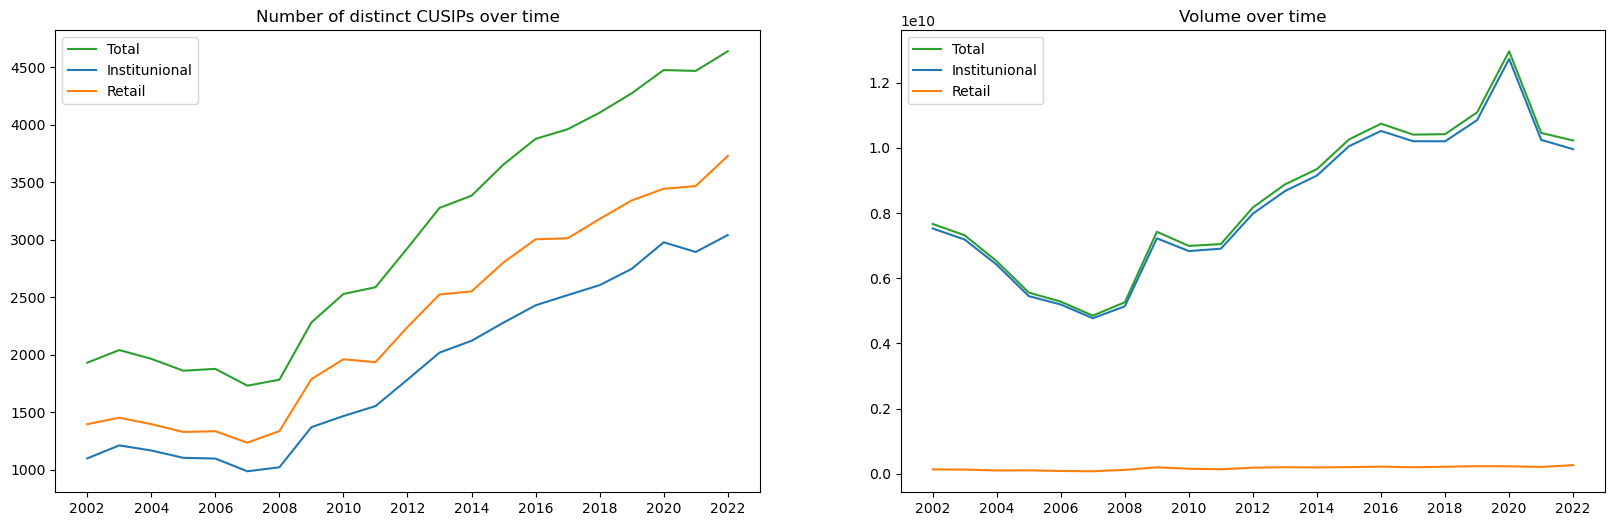

In [21]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.title('Number of distinct CUSIPs over time')
plt.plot(
    df1_gr['Year'], 
    df1_gr['DistinctCusips'],
    color='tab:green',
    label='Total'
)
plt.plot(
    df2_gr[df2_gr['RetailThreshold'] == 'IN']['Year'], 
    df2_gr[df2_gr['RetailThreshold'] == 'IN']['DistinctCusips'], 
    color='tab:blue',
    label='Institunional'
)
plt.plot(
    df2_gr[df2_gr['RetailThreshold'] == 'R']['Year'], 
    df2_gr[df2_gr['RetailThreshold'] == 'R']['DistinctCusips'],
    color='tab:orange',
    label='Retail'
)
plt.legend(loc='upper left')
plt.xticks([x for x in range(2002, 2023, 2)])

plt.subplot(1, 2, 2)
plt.title('Volume over time')
plt.plot(
    df1_gr['Year'], 
    df1_gr['TotalVolume'],
    color='tab:green',
    label='Total'
)
plt.plot(
    df2_gr[df2_gr['RetailThreshold'] == 'IN']['Year'], 
    df2_gr[df2_gr['RetailThreshold'] == 'IN']['TotalVolume'], 
    color='tab:blue',
    label='Institunional'
)
plt.plot(
    df2_gr[df2_gr['RetailThreshold'] == 'R']['Year'], 
    df2_gr[df2_gr['RetailThreshold'] == 'R']['TotalVolume'],
    color='tab:orange',
    label='Retail'
)
plt.legend(loc='upper left')
plt.xticks([x for x in range(2002, 2023, 2)])

plt.show()

### Total Volume | Buy-Sell Side

In [29]:
df3['TrdExctnDt_'] = pd.to_datetime(df3['TrdExctnDt'])

df3['Week'] = df3['TrdExctnDt_'].dt.strftime("%U").astype(str) + \
                                '-' + pd.DatetimeIndex(df3['TrdExctnDt_']).year.astype(str)

df3['Year'] = df3['TrdExctnDt_'].dt.year

df3_gr = df3.groupby(['Year', 'RptSideCd']).aggregate({
    'TotalVolume': np.mean
}).reset_index()

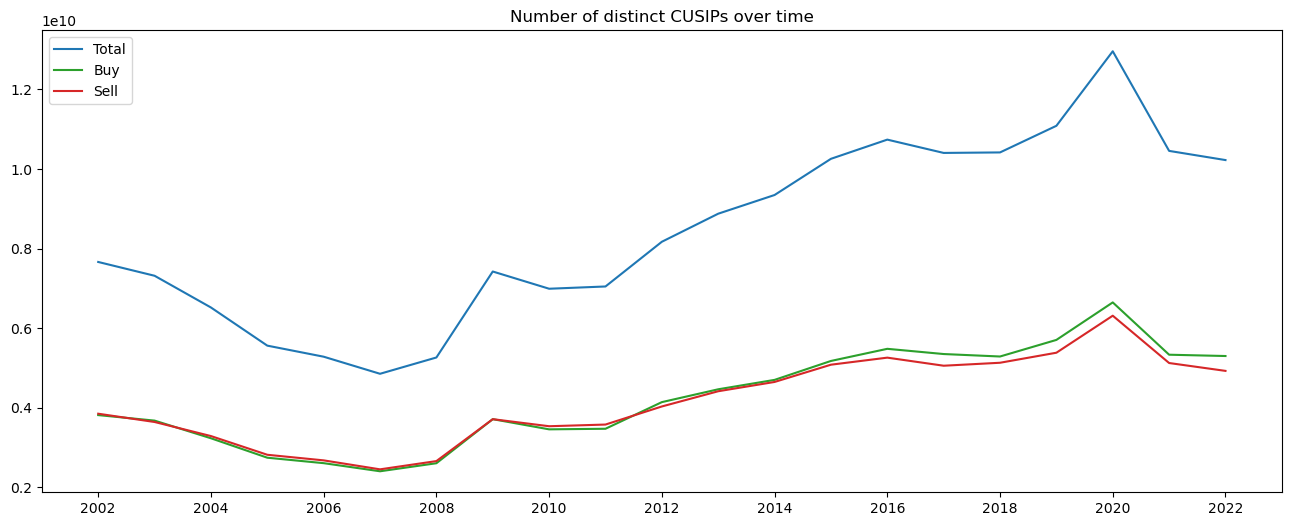

In [33]:
plt.figure(figsize=(16, 6))

plt.title('Number of distinct CUSIPs over time')
plt.plot(
    df1_gr['Year'], 
    df1_gr['TotalVolume'],
    color='tab:blue',
    label='Total'
)
plt.plot(
    df3_gr[df3_gr['RptSideCd'] == 'B']['Year'], 
    df3_gr[df3_gr['RptSideCd'] == 'B']['TotalVolume'], 
    color='tab:green',
    label='Buy'
)
plt.plot(
    df3_gr[df3_gr['RptSideCd'] == 'S']['Year'], 
    df3_gr[df3_gr['RptSideCd'] == 'S']['TotalVolume'],
    color='tab:red',
    label='Sell'
)
plt.legend(loc='upper left')
plt.xticks([x for x in range(2002, 2023, 2)])

plt.show()

### Herding

In [4]:
df4 = pd.read_csv('data/output/herding_stockMarket_2002-2022.csv')

In [6]:
df4['Datadate_'] = pd.to_datetime(df4['Datadate'])

df4['Year'] = df4['Datadate_'].dt.year

df4_gr = df4.groupby('Year').aggregate({
    'Measure': np.mean
}).reset_index()

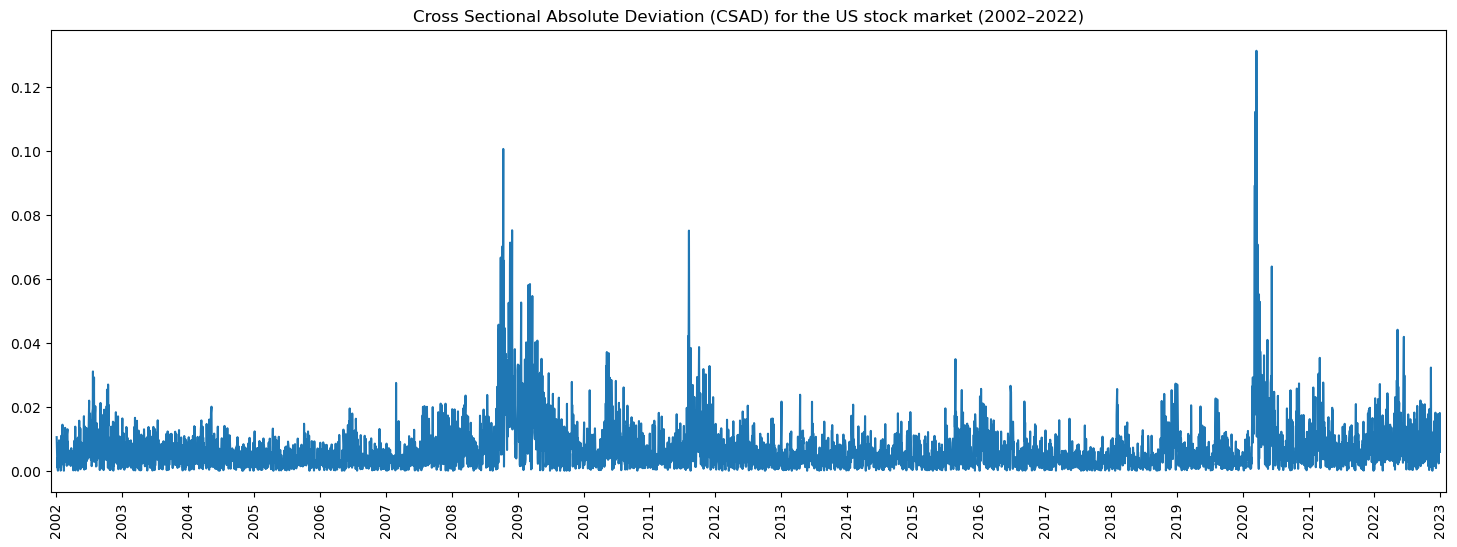

In [95]:
fig, ax = plt.subplots(figsize=(18, 6))

plt.title('Cross Sectional Absolute Deviation (CSAD) for the US stock market (2002–2022)')

ax.plot(df4['Datadate_'], df4['Measure'])

ax.xaxis.set_major_locator(mdates.YearLocator())

plt.xticks(rotation=90)
plt.xlim([pd.to_datetime('2001-12-01'), pd.to_datetime('2023-01-31')])

plt.show()